In [16]:
#sklearn has the ML libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('train.csv',sep=',')
data = np.array(dataset)

In [102]:
"""
Ingredients :
Cost function
Normalization
Gradient descent function 
"""

'\nIngredients :\n'

In [17]:
# m,n are global
# y = map(lambda x: x**2),y)
# .T is same as np.transpose
def normalize(x):
    x_means = np.mean(x,axis=0)
    x_stds = np.std(x,axis=0)
    for i in range(n):
        norm = (x[:,i]-x_means[i])/x_stds[i]
        x[:,i] = norm

def calcCost(x,theta,y):
    h = np.matmul(x,theta)#     can use np.dot(theta,x) as for 2D matrices its same as matrix mult
    J= np.sum((h-y)**2/(2*m))
    return J
    
def gradientDescent(x,theta,y,alpha=0.01):
    h = np.matmul(x,theta)
    delJ = np.matmul(x.T,h-y)
    theta = theta - alpha*delJ/m #arrays are passed by reference
    return theta;

('error', 2.7422621945305265e-08)
('Theta', array([[ 1.99978022],
       [ 2.00046659],
       [ 1.99905488]]))
('ThetaExp', [array([[ 2.],
       [ 2.],
       [ 2.]]), array([[ 3.],
       [ 3.],
       [ 3.]]), array([[ 4.],
       [ 4.],
       [ 4.]])])
('error', 6.1700899376104197e-08)
('Theta', array([[ 2.99967033],
       [ 3.00069988],
       [ 2.99858231]]))
('ThetaExp', [array([[ 2.],
       [ 2.],
       [ 2.]]), array([[ 3.],
       [ 3.],
       [ 3.]]), array([[ 4.],
       [ 4.],
       [ 4.]])])
('error', 1.0969048778122106e-07)
('Theta', array([[ 3.99956044],
       [ 4.00093317],
       [ 3.99810975]]))
('ThetaExp', [array([[ 2.],
       [ 2.],
       [ 2.]]), array([[ 3.],
       [ 3.],
       [ 3.]]), array([[ 4.],
       [ 4.],
       [ 4.]])])


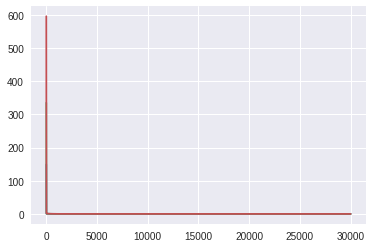

In [125]:
datasize=10
featsize=2
x= np.array([[i,i/2] for i in range(datasize)])
#all rows, all minus one col
# x=data[:datasize,2:featsize+2] #all rows, all minus one col
x=x.astype('float32')
m,n=x.shape
ones= np.array([[1] for i in range(m)])
x = np.concatenate((ones,x),axis=1)
# OR USE np.append(x, np.ones([x.shape[0], 1], dtype=np.int32), axis=1)

thetaExpected= [2*np.ones((n + 1,1)),
                3*np.ones((n + 1,1)),
                4*np.ones((n + 1,1))]
#column vector n+1 x 1

y =[]
for theta in thetaExpected:
    y.append(np.matmul(x,theta))

# y= np.array([[i] for i in range(datasize)])
# y=y.astype('float32')
# y=data[:datasize,-1] # all rows, last column

#doesn't work well sometimes-
# normalize(x)
numOuts=len(y)
theta= np.zeros((numOuts,n + 1,1)) #column vector n+1 x 1
iterations = 30000

#for plots to be visible
%matplotlib inline

for j in range(numOuts):
    J_hist=[]
    t_hist=[]
    for i in range(iterations):
        J_hist.append(calcCost(x,theta[j],y[j]))
        theta[j] =gradientDescent(x,theta[j],y[j],alpha=0.005)
        t_hist.append(theta[j])

    #final trained values
    h_hist = np.matmul(x,theta[0])
# h_hist = np.matmul(x,theta)[0]
# plt.plot(h_hist)
    plt.plot(J_hist)
    print("error",J_hist[-1])
    print("Theta",t_hist[-1])

    print("ThetaExp",thetaExpected)


(10, 1)


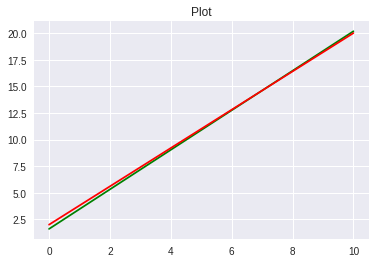

In [118]:
h = pd.DataFrame(h_hist)
nh=np.array(h_hist).reshape((datasize,1))
area = np.pi*3
colors=(0,0,0)
print(nh.shape)

# plt.scatter(np.linspace(0,m,m),nh, s=area, c=colors, alpha=0.5)
# plt.scatter(np.linspace(0,m,m),y, s=area, c=(1,1,1), alpha=0.5)
xn=np.linspace(0,m,m)
plt.plot(xn,nh,'g')
plt.plot(xn,y,'r')
plt.title('Plot')
plt.show()